In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, user, password
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from math import sqrt
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 


import wrangle3
import explore

In [2]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()


 The correlation between the taxvaluedollarcnt of a home and the the logerror: -0.00
 The P value between the taxvaluedollarcnt of a home and the logerror:  0.43
 
Fail to reject the null hypothesis.


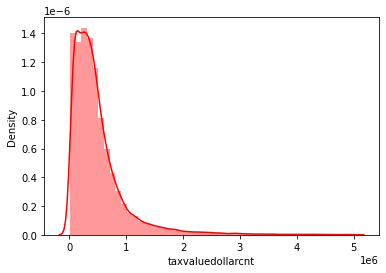

In [3]:
explore.taxvaluedollarcnt_corr()

In [ ]:
X_train['taxvaluedollarcnt']

# Cluster 1: Area

In [ ]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
explore.find_k(X_train, cluster_vars, k_range)

In [ ]:
# talk to Jared about mapping area on google maps API

# Cluster 2 : Size

In [ ]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

explore. find_k(X_train, cluster_vars, k_range)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

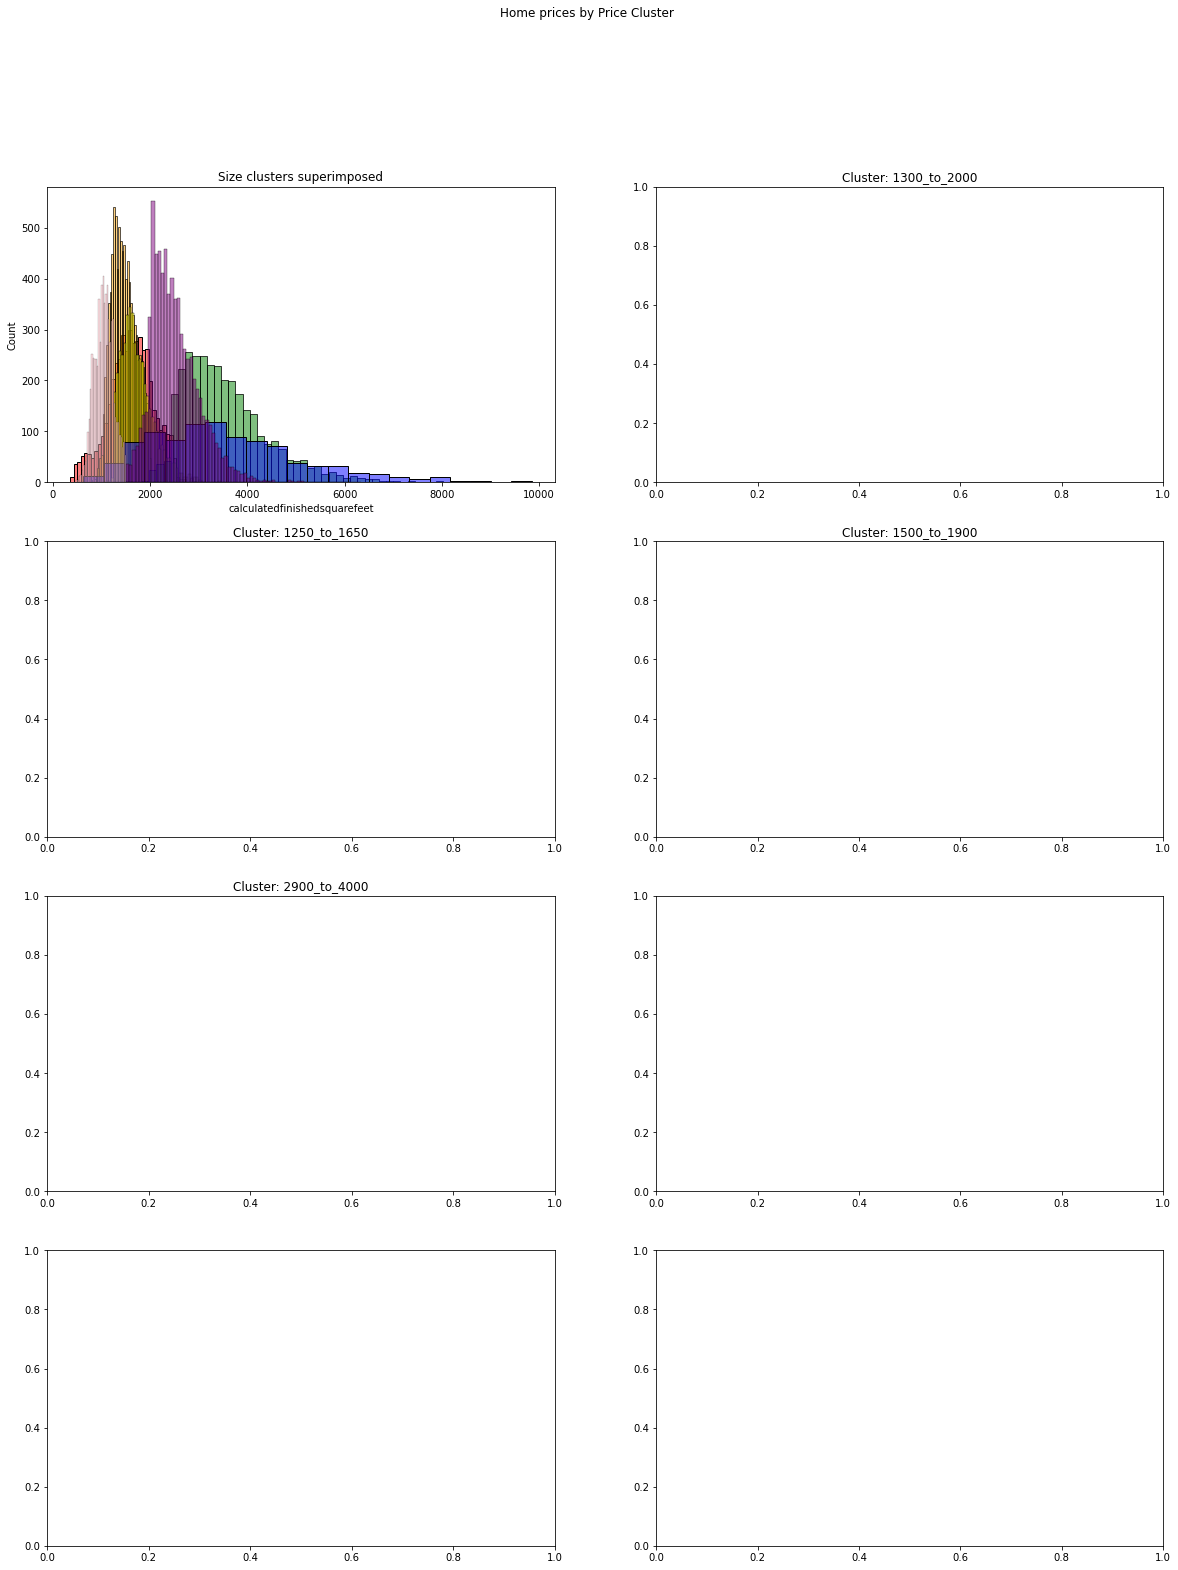

In [4]:
explore.plot_size_clusters()

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='size_cluster', alpha =0.2);

# Cluster 3: Price

In [ ]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'

explore.find_k(X_train, cluster_vars, k_range)

In [ ]:
X_train.head()

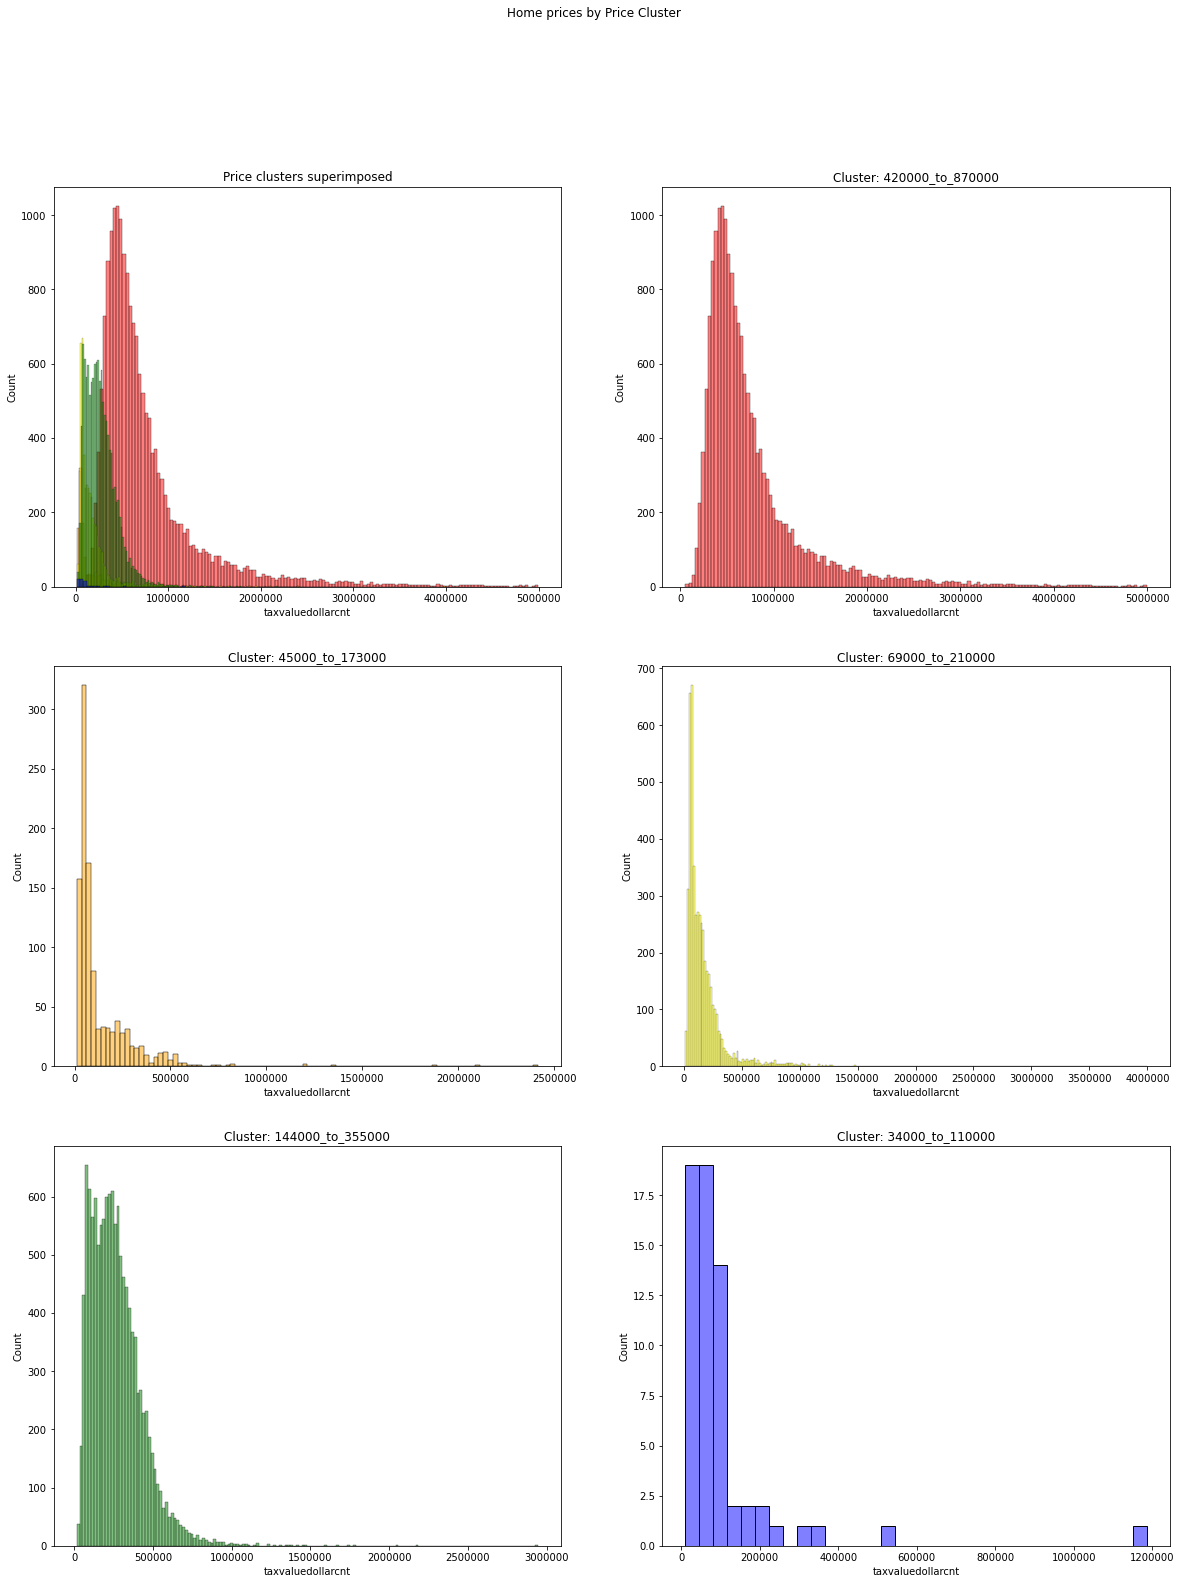

In [5]:
explore.plot_prices_clusters()

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='price_cluster', alpha =0.2);

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='logerror_bins', col='size_cluster', col_wrap=2);

# Cluster 4 : Tax

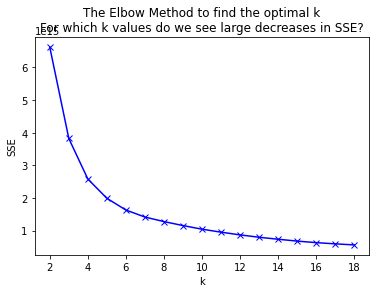

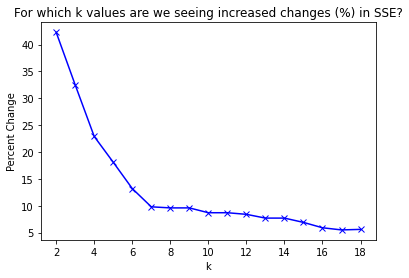

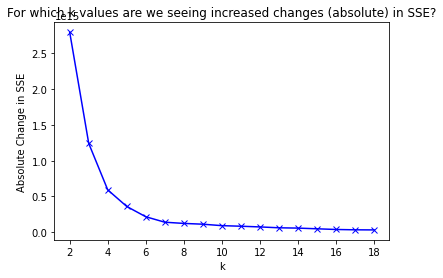

,k,sse,delta,pct_delta
0,2,6619195678852811.00000,2796914685688622.00000,42.30000
1,3,3822280993164188.50000,1241745059121906.00000,32.50000
2,4,2580535934042283.00000,591230014162554.00000,22.90000
3,5,1989305919879729.25000,359252870408241.00000,18.10000
4,6,1630053049471488.50000,215454388522691.00000,13.20000
5,7,1414598660948797.25000,138975333985157.00000,9.80000
6,8,1275623326963640.50000,122260102947529.00000,9.60000
7,9,1153363224016111.75000,111246303677446.00000,9.60000
8,10,1042116920338665.75000,90911798318310.00000,8.70000
9,11,951205122020355.62500,83008732001250.00000,8.70000


In [6]:
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
cluster_name = 'tax_cluster'
k_range = range(2,20)

explore.find_k(X_train, cluster_vars, k_range)

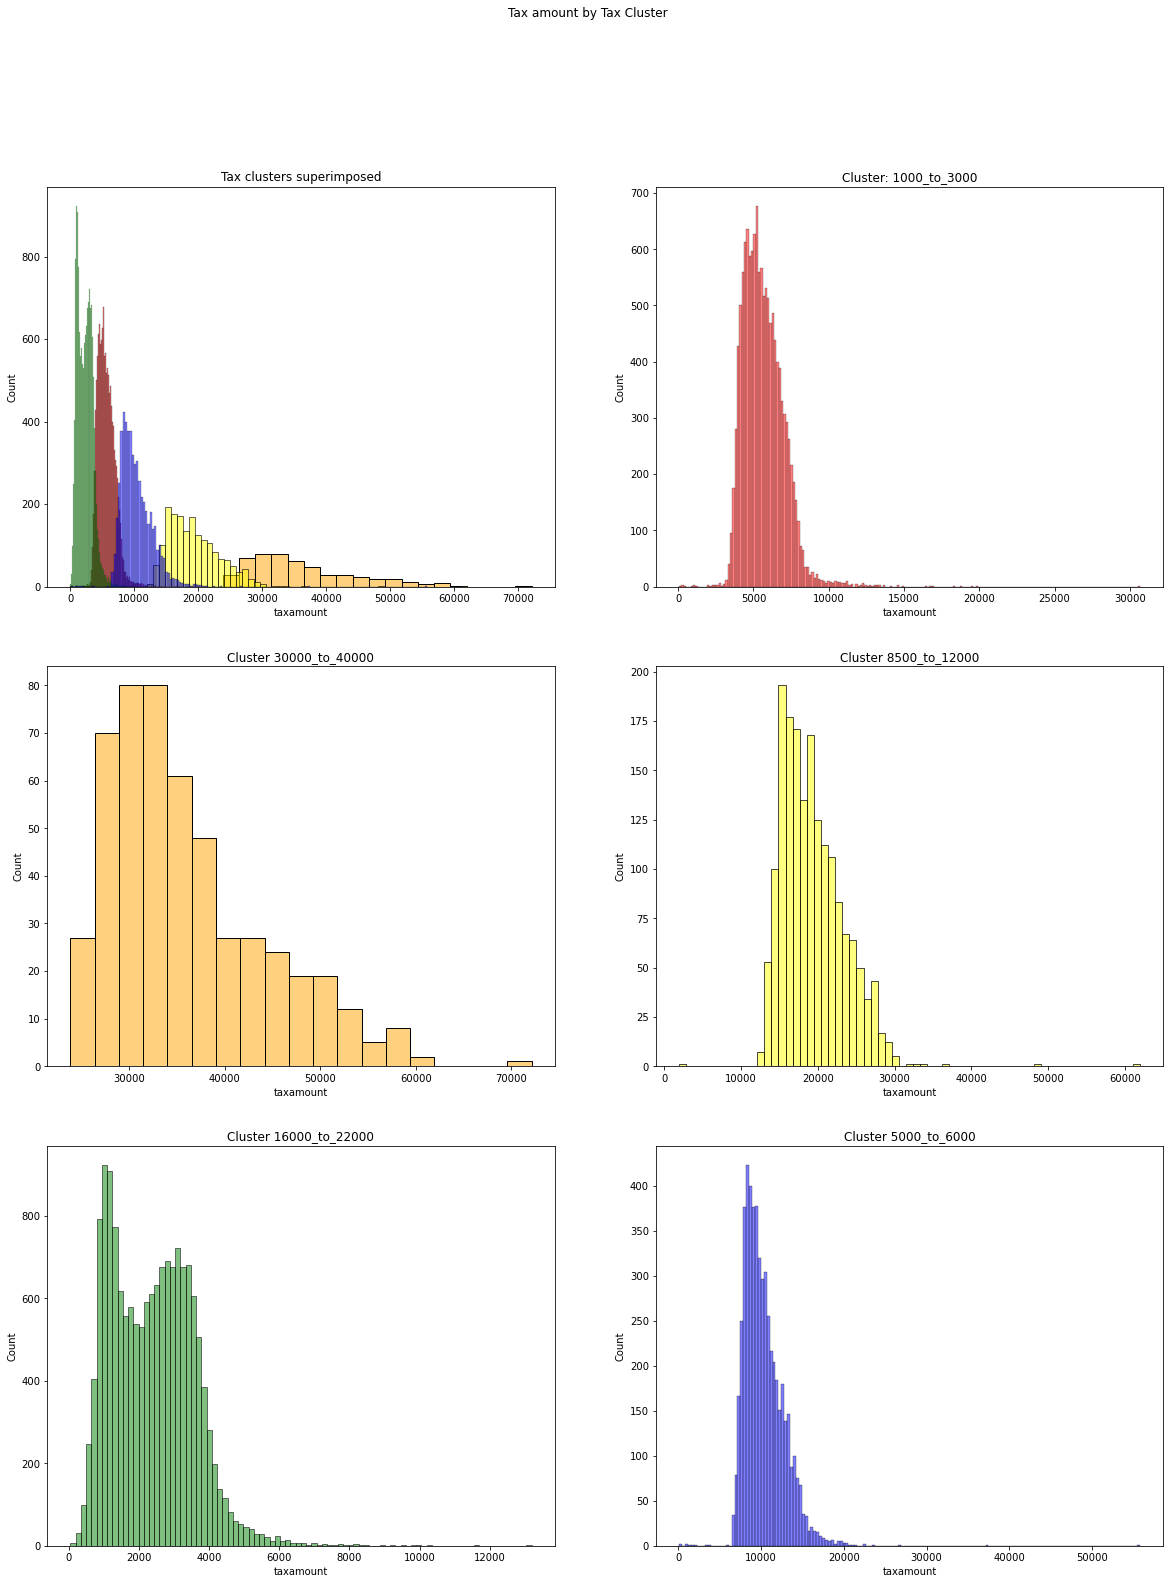

In [9]:
explore.plot_tax_cluster()

In [ ]:
X_train['tax_cluster'] = kmeans.predict(X_train[cluster_vars])
X_validate['tax_cluster'] = kmeans.predict(X_validate[cluster_vars])

In [ ]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [ ]:
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [ ]:
k=5
cluster_name = 'tax_cluster'
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']

# fit kmeans 
kmeans = create_clusters(X_train, k, cluster_vars)
kmeans = create_clusters(X_validate, k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [ ]:
t0 =X_train[X_train['tax_cluster']==0]
t1 =X_train[X_train['tax_cluster']==1]
t2 =X_train[X_train['tax_cluster']==2]
t3 =X_train[X_train['tax_cluster']==3]
t4 =X_train[X_train['tax_cluster']==4]
t5 =X_train[X_train['tax_cluster']==5]

In [ ]:
k=5
cluster_name = 'tax_cluster'
cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
# fit kmean
kmeans = create_clusters(X_train, k, cluster_vars)
kmeans = create_clusters(X_validate, k, cluster_vars)
# get centroid values per variable per cluster
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


In [ ]:
X_train[‘price_cluster’] = kmeans.predict(X_train[cluster_vars])
X_validate[‘price_cluster’] = kmeans.predict(X_validate[cluster_vars])

In [ ]:
def find_k(X_train, cluster_vars, k_range):
    #enter clusters/features, cluster_name, & range    
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

In [ ]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
find_k(X_train, cluster_vars, k_range)

In [ ]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
#k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

In [ ]:

#Plot size clusters
fig, axes = plt.subplots(4,2, sharex=False, figsize=(20, 25))
fig.suptitle('Home prices by Price Cluster')
#axes[0].set_title('All clusters together')
#axes[1].set_title('Cluster a')
#axes[2].set_title('Cluster b')
#axes[3].set_title('Cluster c')
#axes[4].set_title('Cluster d')
#axes[5].set_title('Cluster e')
sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,0])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[0,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[0,0])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[0,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[0,0])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[0,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[0,0])
axes[0,0].ticklabel_format(style='plain')
axes[0,0].set_title('Size clusters superimposed')
axes[0,1].ticklabel_format(style='plain')
axes[0,1].set_title('Cluster a')

axes[1,0].ticklabel_format(style='plain')
axes[1,0].set_title('Cluster b')
axes[1,1].ticklabel_format(style='plain')
axes[1,1].set_title('Cluster c')
axes[2,0].ticklabel_format(style='plain')
axes[2,0].set_title('Cluster d')
axes[3,0].ticklabel_format(style='plain')
axes[3,0].set_title('Cluster e')
axes[3,1].ticklabel_format(style='plain')
axes[3,1].set_title('Cluster f')

sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,1])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[1,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[1,1])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[2,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[2,1])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[3,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[3,1])

plt.ticklabel_format(style='plain')

plt.show()

In [ ]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'
k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='age', col='price_cluster', col_wrap=2);


In [ ]:
X_train['price_cluster'].value_counts()

In [ ]:
#using all three moving forward so just implement the function

In [ ]:
train['logerror']

In [ ]:
# Create Model
ols_model5 = ols(formula='log_error ~ area_cluster_la_newer + area_cluster_la_older + area_cluster_northwest_costal + area_cluster_palmdale_landcaster + area_cluster_santa_clarita + area_cluster_se_coast + size_cluster_a + size_cluster_b + size_cluster_c + size_cluster_d + size_cluster_e + size_cluster_f + size_cluster_g + price_cluster_a + price_cluster_b + price_cluster_c + price_cluster_d + price_cluster_e + taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt', data=train).fit()

# Make predictions
ols5_yhat = ols_model5.predict(X_train)
X_train['mvp_prdictions']=ols5_yhat
ols_eval['ols5_yhat']=ols5_yhat

ols5_validate_yhat = ols_model5.predict(X_validate)
X_validate['ols5_prdictions']=ols5_validate_yhat

In [ ]:
baseline_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.baseline_yhat)))
ols_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols_yhat)))
ols5_RMSE = (sqrt(mean_squared_error(ols_eval.actual, ols_eval.ols5_yhat)))
pct_change_baseline=(((ols5_RMSE-baseline_RMSE)/baseline_RMSE)*100)
pct_change_last_model=(((ols5_RMSE-ols_RMSE)/ols_RMSE)*100)
rmse_validate = (sqrt(mean_squared_error(validate_eval.actual, validate_eval.ols5_yhat)))
baseline_r2 = (r2_score(ols_eval.actual, ols_eval.baseline_yhat))
ols5_train_r2 = (r2_score(ols_eval.actual, ols_eval.ols5_yhat))
ols5_validate_r2 = (r2_score(validate_eval.actual, validate_eval.ols5_yhat))
# Display findings
print(f'My model has value: {ols_RMSE < baseline_RMSE}')
print(f'My model beats previous model: {ols5_RMSE < ols_RMSE}')
print()
print(f'Baseline RMSE: {baseline_RMSE}')
print(f'Model 1 RMSE: {ols_RMSE}')
print(f'Current model train RMSE: {ols5_RMSE}')
print(f'Current model validate RMSE: {rmse_validate}')
print()
print(f'Current model train RMSE difference from baseline: {baseline_RMSE- ols5_RMSE}')
print(f'Current model validate RMSE difference from baseline: {baseline_RMSE- rmse_validate}')
print()

print(f'Current model RMSE difference from best model: {ols5_RMSE- ols_RMSE}')
print()

print(f'RMSE difference train to validate: {ols2_RMSE- rmse_validate}')
print(f'Current model baseline RMSE improvement: {pct_change_baseline}%')
print(f'Current model RMSE improvement from last model: {pct_change_last_model}%')
print()
print(f'Baseline R2: {baseline_r2}')
print(f'Model train  R2: {ols3_train_r2}')
print(f'Model Validate R2: {ols5_validate_r2}')

In [ ]:
# Create Model
ols_model4 = ols(formula='log_error ~ taxvaluedollarcnt + structuretaxvaluedollarcnt + taxvaluedollarcnt + landtaxvaluedollarcnt + acres + age', data=train).fit()

# Make predictions
ols4_yhat = ols_model4.predict(X_train)
ols_eval['ols4_yhat']=ols4_yhat
X_train['ols4_prdictions']=ols4_yhat
